<AxesSubplot:xlabel='Date'>

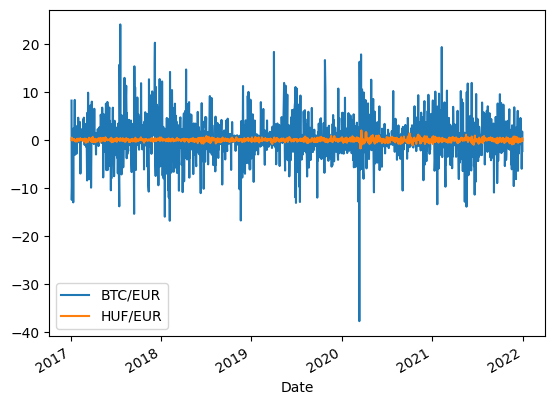

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
btc_eur = pd.read_csv('./investingData/BTC_EUR Kraken Historical Data.csv',thousands=',')[['Price','Date']].rename(columns={'Price':'BTC/EUR'})
huf_eur = pd.read_csv('./investingData/HUF_EUR Historical Data.csv',thousands=',')[['Price','Date']].rename(columns={'Price':'HUF/EUR'})
btc_eur['Date'] = pd.to_datetime(btc_eur['Date'])
huf_eur['Date'] = pd.to_datetime(huf_eur['Date'])
df = pd.merge(huf_eur,btc_eur,on='Date',how='left')
# df['BTC/EUR'] = pd.to_numeric(df['BTC/EUR'].astype(str).str.replace(',',''))
# df['HUF/EUR'] = pd.to_numeric(df['HUF/EUR'].astype(str).str.replace(',',''))
changes = df.set_index('Date').sort_index()[['BTC/EUR','HUF/EUR']].pct_change()*100
changes.iloc[20:].plot()


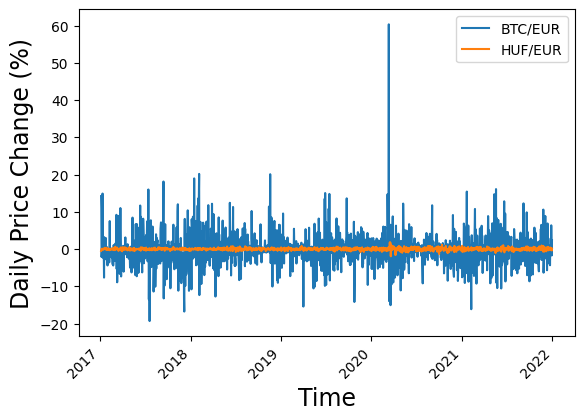

In [95]:
import matplotlib.dates as md
tmp = pd.merge(huf_eur,btc_eur,on='Date',how='left').iloc[:-20]
tmp = tmp.set_index('Date')
tmp['ch_btc'] = tmp['BTC/EUR'].pct_change()*100
tmp['ch_huf'] = tmp['HUF/EUR'].pct_change()*100
ax = tmp['ch_btc'].plot(label="BTC/EUR")
ax = tmp['ch_huf'].plot(label="HUF/EUR")

ax.xaxis.set_major_locator(md.YearLocator())
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y'))
# (optional) rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45);

plt.ylabel('Daily Price Change (%)',fontsize=17)
plt.xlabel('Time',fontsize=17)
plt.legend()
plt.savefig('./documents/figures/fluctuations.png')

In [91]:
tmp.sort_index()

,HUF/EUR,BTC/EUR,ch,ch_btc,ch_huf
Date,,,,,
2017-01-04,0.003232,1074.0,14.243166,14.243166,-0.461965
2017-01-05,0.003247,940.1,10.965534,10.965534,-0.184445
2017-01-06,0.003253,847.2,-0.865902,-2.136999,0.061520
2017-01-08,0.003251,865.7,0.429234,0.429234,0.061557
2017-01-09,0.003249,862.0,-0.668357,-0.668357,0.092421
...,...,...,...,...,...
2021-12-27,0.002704,44749.2,6.388158,6.388158,-0.110824
2021-12-28,0.002707,42062.2,2.787783,2.787783,0.259259
2021-12-29,0.002700,40921.4,-1.707096,-1.707096,-0.369004


In [53]:
tmp = changes[changes.index.year==2020].pct_change()
tmp

,BTC/EUR,HUF/EUR
Date,,
2020-01-01,NaN,NaN
2020-01-02,-113.346902,15.994375
2020-01-03,-3.006318,-1.350967
2020-01-05,-0.950859,-1.000000
2020-01-06,18.287229,-inf
...,...,...
2020-12-27,0.367741,-0.500362
2020-12-28,-0.309389,-11.996014
2020-12-29,-0.733561,-0.361090


In [60]:
tmp[np.isinf(tmp['BTC/EUR'])]

,BTC/EUR,HUF/EUR
Date,,
2020-01-06,18.287229,-inf
2020-01-20,-0.662703,inf
2020-02-04,19.490860,inf
2020-02-19,-2.073252,-inf
2020-03-05,8.007859,-inf
2020-05-08,-1.204954,inf
2020-05-18,-1.056490,inf
2020-07-20,-2.183866,inf
2020-07-28,-1.061745,-inf


In [47]:
df

,HUF/EUR,Date,BTC/EUR
0,0.002708,2021-12-31,40660.3
1,0.002710,2021-12-30,41632.1
2,0.002700,2021-12-29,40921.4
3,0.002707,2021-12-28,42062.2
4,0.002704,2021-12-27,44749.2
...,...,...,...
1578,0.003230,2016-11-14,655.3
1579,0.003228,2016-11-13,647.2
1580,0.003249,2016-11-11,661.0
1581,0.003250,2016-11-10,658.0
